In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# kaggle 데이터 불러오기
import http.client

# 그래프 그리기 
import matplotlib.pyplot as plt
import seaborn as sns

# crawling
from bs4 import BeautifulSoup
import urllib.request as req
import time

In [2]:


주차장정보 = pd.read_csv('../../Data/한강공원 주차장 정보.csv',encoding='euc-kr')

-----
### Kaggle


In [3]:
# !pip install kagglehub

In [4]:


conn = http.client.HTTPSConnection("travel-advisor.p.rapidapi.com")

payload = "{\"contentType\":\"hotel\",\"contentId\":\"4172546\",\"questionId\":\"8393250\",\"pagee\":0,\"updateToken\":\"\"}"

headers = {
    'x-rapidapi-key': "aec43032d7msh6f891ac493424f0p19965ajsnfb40027abe1b",
    'x-rapidapi-host': "travel-advisor.p.rapidapi.com",
    'Content-Type': "application/json"
}

conn.request("POST", "/answers/v2/list?currency=USD&units=km&lang=en_US", payload, headers)

res = conn.getresponse()
data = res.read()
data = data.decode('utf-8')

In [5]:
print(data)

{
  "data" : {
    "AppPresentation_queryPoiQuestionDetails" : {
      "__typename" : "AppPresentation_PoiQuestionDetailsPageResponse",
      "container" : {
        "__typename" : "AppPresentation_PoiQaPageResponseContainer",
        "navTitle" : "Amiana Resort Nha Trang"
      },
      "sections" : [ {
        "__typename" : "AppPresentation_PoiQuestionSection",
        "trackingTitle" : "QuestionSection",
        "trackingKey" : "{\"ik\":\"50e51f65-b8f8-4bc4-8336-d681debc85a4_0\",\"sn\":\"PoiQNADetails\"}",
        "stableDiffingType" : "QuestionSection",
        "clusterId" : null,
        "actions" : {
          "__typename" : "AppPresentation_PoiQaActions",
          "deleteAction" : {
            "__typename" : "AppPresentation_PoiQaAnswersAjaxAction",
            "authenticateUser" : true,
            "tpcid" : 8393250,
            "pid" : 38100,
            "pstid" : null,
            "lcid" : null
          }
        },
        "memberProfile" : {
          "__typename" : "Ap

---------
### Crawling

#### 한강공원 이용자 통계
- 컬럼 CSS 선택자 : '#anchor-content > div.contents-area > div > div.usage-status-table > div:nth-child(2) > table > thead > tr:nth-child(2)
- 공원별 id : AID(4~14)


In [6]:
year = list(range(2018,2025)) # url page 년도 
year
month = list((range(1,13))) # url page 월

In [7]:
monthstr = [] # url 형식에 맞게 변경
for m in month :
    # print('0'+f'{m}')
    if m < 10:
        m = '0' + f'{m}'
        monthstr.append(m)
    else:
        monthstr.append(f'{m}')

print(monthstr)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


> 크롤링 테스트 

In [ ]:
import urllib.request as req
from bs4 import BeautifulSoup
import time

result = []
years = range(2018, 2025)  # 2018부터 2024까지
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for year in years:
    for month in months:
        url = f'https://hangang.seoul.go.kr/www/utztnStats/utztnStats.do?mid=622&opt2={year}-{month}&opt3={year}-{month}&sdtYear={year}&sdtMonth={month}&edtYear={year}&edtMonth={month}'
        
        try:
            res = req.urlopen(url)
            time.sleep(4)
            soup = BeautifulSoup(res, 'html.parser')
            
            month_data = []
            for i in range(4, 15):
                row_data = []
                for td in soup.select(f'#AID{i} > td'):
                    row_data.append(td.get_text().strip())
                month_data.append(row_data)
            
            result.append(month_data)
        except Exception as e:
            print(f'Error occurred for {year}-{month}: {str(e)}')
        if year == 2024 and month == '02':
            break
        time.sleep(4)

print(f"Total months of data collected: {len(result)}")


KeyboardInterrupt: 

In [ ]:

# 모든 월별 데이터를 하나의 데이터프레임으로 결합
df = pd.concat([pd.DataFrame(month_data) for month_data in result], ignore_index=True)

# 컬럼 이름 설정

# 결과 확인
print(df.head())
print(f"Total rows: {len(df)}")


----
## 주차장일별


> 지구별 코드 변경

In [9]:
주차장일별 = pd.read_csv('../../Data/한강공원 주차장 일별 이용 현황.csv', encoding='euc-kr')

In [10]:
주차장일별

,지구별,주차장명,주차대수,이용시간,날짜
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10
1,PLT-011,잠실1주차장,1059,66361,2024/11/10
2,PLT-001,강서1주차장,329,26875,2024/11/10
3,PLT-008,여의도5주차장,229,22509,2024/11/10
4,PLT-008,여의도2주차장,1934,150135,2024/11/10
...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020/01/16
45273,PLT-001,강서1주차장,28,347,2020/01/16
45274,PLT-008,여의도1주차장,114,6073,2020/01/15
45275,PLT-001,강서1주차장,12,68,2020/01/15


In [11]:
# 주차장일별['code'] 
codelist = []
for code in 주차장일별['지구별']:
    codelist.append(code.replace('PLT-',""))

In [12]:
주차장일별['code'] = codelist

> 날짜를 년,월,일로 구분

In [13]:
주차장일별['날짜']= pd.to_datetime(주차장일별['날짜'], format='%Y/%m/%d')

In [30]:
주차장일별['년도']= 주차장일별['날짜'].dt.year
주차장일별['월']= 주차장일별['날짜'].dt.month
주차장일별['일']= 주차장일별['날짜'].dt.day

In [31]:
주차장일별

,지구별,주차장명,주차대수,이용시간,날짜,code,년도,월,일,휴일여부
0,PLT-005,뚝섬1주차장,273,1.397497,2024-11-10,005,2024,11,10,주말
1,PLT-011,잠실1주차장,1059,1.044397,2024-11-10,011,2024,11,10,주말
2,PLT-001,강서1주차장,329,1.361449,2024-11-10,001,2024,11,10,주말
3,PLT-008,여의도5주차장,229,1.638210,2024-11-10,008,2024,11,10,주말
4,PLT-008,여의도2주차장,1934,1.293821,2024-11-10,008,2024,11,10,주말
...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,4.228408,2020-01-16,008,2020,1,16,평일
45273,PLT-001,강서1주차장,28,0.206548,2020-01-16,001,2020,1,16,평일
45274,PLT-008,여의도1주차장,114,0.887865,2020-01-15,008,2020,1,15,평일
45275,PLT-001,강서1주차장,12,0.094444,2020-01-15,001,2020,1,15,평일


In [32]:
%pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [33]:
# 평일 휴일로 분리 시켜주기 
import holidays

# 대한민국 공휴일 가져오기
kr_holidays = holidays.KR(years=range(2020,2025))

# 날짜가 공휴일인지를 체크하는 함수 추가
주차장일별['휴일여부'] = 주차장일별['날짜'].apply(lambda x: '휴일' if x in kr_holidays else ('주말' if x.weekday() >= 5 else '평일'))


In [34]:
주차장일별.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지구별     45277 non-null  object        
 1   주차장명    45277 non-null  object        
 2   주차대수    45277 non-null  int64         
 3   이용시간    45277 non-null  float64       
 4   날짜      45277 non-null  datetime64[ns]
 5   code    45277 non-null  object        
 6   년도      45277 non-null  int32         
 7   월       45277 non-null  int32         
 8   일       45277 non-null  int32         
 9   휴일여부    45277 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(4)
memory usage: 2.9+ MB


In [35]:
주차장일별

,지구별,주차장명,주차대수,이용시간,날짜,code,년도,월,일,휴일여부
0,PLT-005,뚝섬1주차장,273,1.397497,2024-11-10,005,2024,11,10,주말
1,PLT-011,잠실1주차장,1059,1.044397,2024-11-10,011,2024,11,10,주말
2,PLT-001,강서1주차장,329,1.361449,2024-11-10,001,2024,11,10,주말
3,PLT-008,여의도5주차장,229,1.638210,2024-11-10,008,2024,11,10,주말
4,PLT-008,여의도2주차장,1934,1.293821,2024-11-10,008,2024,11,10,주말
...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,4.228408,2020-01-16,008,2020,1,16,평일
45273,PLT-001,강서1주차장,28,0.206548,2020-01-16,001,2020,1,16,평일
45274,PLT-008,여의도1주차장,114,0.887865,2020-01-15,008,2020,1,15,평일
45275,PLT-001,강서1주차장,12,0.094444,2020-01-15,001,2020,1,15,평일


In [36]:
주차장일별['이용시간'] = (주차장일별['이용시간']/60) / 주차장일별['주차대수']

In [37]:
주차장일별.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지구별     45277 non-null  object        
 1   주차장명    45277 non-null  object        
 2   주차대수    45277 non-null  int64         
 3   이용시간    45277 non-null  float64       
 4   날짜      45277 non-null  datetime64[ns]
 5   code    45277 non-null  object        
 6   년도      45277 non-null  int32         
 7   월       45277 non-null  int32         
 8   일       45277 non-null  int32         
 9   휴일여부    45277 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(4)
memory usage: 2.9+ MB


-----
### 날씨

> 날씨 강수량, 강수지속시간 null값 처리

In [38]:
한강날씨 = pd.read_csv('../../Data/서울날씨20-24.csv',encoding='euc-kr')

In [39]:
한강날씨.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             1763 non-null   int64  
 1   지점명            1763 non-null   object 
 2   일시             1763 non-null   object 
 3   평균기온(°C)       1763 non-null   float64
 4   최저기온(°C)       1762 non-null   float64
 5   최저기온 시각(hhmi)  1762 non-null   float64
 6   최고기온(°C)       1763 non-null   float64
 7   최고기온 시각(hhmi)  1763 non-null   int64  
 8   강수 계속시간(hr)    739 non-null    float64
 9   일강수량(mm)       740 non-null    float64
 10  평균 이슬점온도(°C)   1763 non-null   float64
 11  평균 상대습도(%)     1763 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 165.4+ KB


-------
### 서울시 한강공원 월별 이용객


In [40]:
월별이용객통계=pd.read_csv('../../Data/서울시 한강공원 월별 이용객 현황.csv', encoding='euc-kr')

In [41]:
월별이용객통계

,현황 일련번호,공원 코드,공원명,공원 시명,공원 구명,공원 지번 주소,공원 도로명 주소,등록자 일련번호,등록 일시,수정자 일련번호,...,강변물놀이장,강변프롬나드,난지 하늘다리,갈대숲탐장로,꿀벌숲,치유의숲,그라스정원,노들섬,습지생태공원,현황 일시
0,87623,Hzone001,광나루한강공원,서울,강동구,암사동 637-6,선사로 83-106,83,2024-03-08 10:40:48.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
1,87629,Hzone006,이촌한강공원,서울,용산구,이촌동 302-17,이촌로72길 62,83,2024-03-08 14:14:33.0,NaN,...,0,0,0,0,0,0,0,19198,0,2024-02-29 00:00:00.0
2,87626,Hzone003,뚝섬한강공원,서울,광진구,자양동 427-1,강변북로 2273,83,2024-03-08 11:29:41.0,83.0,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
3,87625,Hzone002,잠실한강공원,서울,송파구,잠실동 1-1,한가람로 65,83,2024-03-08 10:44:40.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
4,87631,Hzone008,양화한강공원,서울,영등포구,당산동 98-1,노들로 221,83,2024-03-08 14:40:51.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,86798,Hzone002,잠실한강공원,서울,송파구,잠실동 1-1,한가람로 65,5,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,0,0,2018-01-31 00:00:00.0
811,86802,Hzone007,여의도한강공원,서울,영등포구,여의도동 85-1,여의동로 280,10,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,0,0,2018-01-31 00:00:00.0
812,86801,Hzone008,양화한강공원,서울,영등포구,당산동 98-1,노들로 221,11,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,0,0,2018-01-31 00:00:00.0
813,86800,Hzone003,뚝섬한강공원,서울,광진구,자양동 427-1,강변북로 2273,6,2018-01-31 00:00:00.0,NaN,...,0,0,0,0,0,0,0,0,0,2018-01-31 00:00:00.0


In [42]:
주차장일별

,지구별,주차장명,주차대수,이용시간,날짜,code,년도,월,일,휴일여부
0,PLT-005,뚝섬1주차장,273,0.000085,2024-11-10,005,2024,11,10,주말
1,PLT-011,잠실1주차장,1059,0.000016,2024-11-10,011,2024,11,10,주말
2,PLT-001,강서1주차장,329,0.000069,2024-11-10,001,2024,11,10,주말
3,PLT-008,여의도5주차장,229,0.000119,2024-11-10,008,2024,11,10,주말
4,PLT-008,여의도2주차장,1934,0.000011,2024-11-10,008,2024,11,10,주말
...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,0.000081,2020-01-16,008,2020,1,16,평일
45273,PLT-001,강서1주차장,28,0.000123,2020-01-16,001,2020,1,16,평일
45274,PLT-008,여의도1주차장,114,0.000130,2020-01-15,008,2020,1,15,평일
45275,PLT-001,강서1주차장,12,0.000131,2020-01-15,001,2020,1,15,평일


----------
### 날씨, 월별 주차장 병합
- 강서 53
- 잠원 735
- 망원 229
- 반포 740
- 난지 620
- 뚝섬 671
- 잠실 663
- 이촌 257
- 양화 501
- 광나루 359
- 여의도 1433

In [ ]:
한강날씨['일시'] = pd.to_datetime(한강날씨['일시'])
한강날씨.info()

In [ ]:
한강날씨['일시'].value_counts()

In [ ]:
merge_weather= pd.merge(주차장일별, 한강날씨, how= 'left', right_on='일시', left_on='날짜')

In [ ]:
# 20220808 서울 날씨
# 최저기온 24도, 최저기온시각 13시, 14시 
# 검색을 통해서 얻은 정보
merge_weather['최저기온(°C)'].fillna(24,inplace=True)
merge_weather['최저기온 시각(hhmi)'].fillna(1300,inplace=True)

In [ ]:
# 강수 계속시간, 일강수량 nan값 해결
merge_weather['강수 계속시간(hr)'].fillna(0,inplace=True)
merge_weather['일강수량(mm)'].fillna(0,inplace=True)


In [ ]:
merge_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지구별            45277 non-null  object        
 1   주차장명           45277 non-null  object        
 2   주차대수           45277 non-null  int64         
 3   이용시간           45277 non-null  float64       
 4   날짜             45277 non-null  datetime64[ns]
 5   code           45277 non-null  object        
 6   년도             45277 non-null  object        
 7   월              45277 non-null  object        
 8   일              45277 non-null  object        
 9   휴일여부           45277 non-null  object        
 10  지점             45277 non-null  int64         
 11  지점명            45277 non-null  object        
 12  일시             45277 non-null  datetime64[ns]
 13  평균기온(°C)       45277 non-null  float64       
 14  최저기온(°C)       45251 non-null  float64       
 15  최저기온 시각(hhmi)  4525

In [ ]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")


In [ ]:
merge_weather.drop('지점', axis =1 , inplace=True)

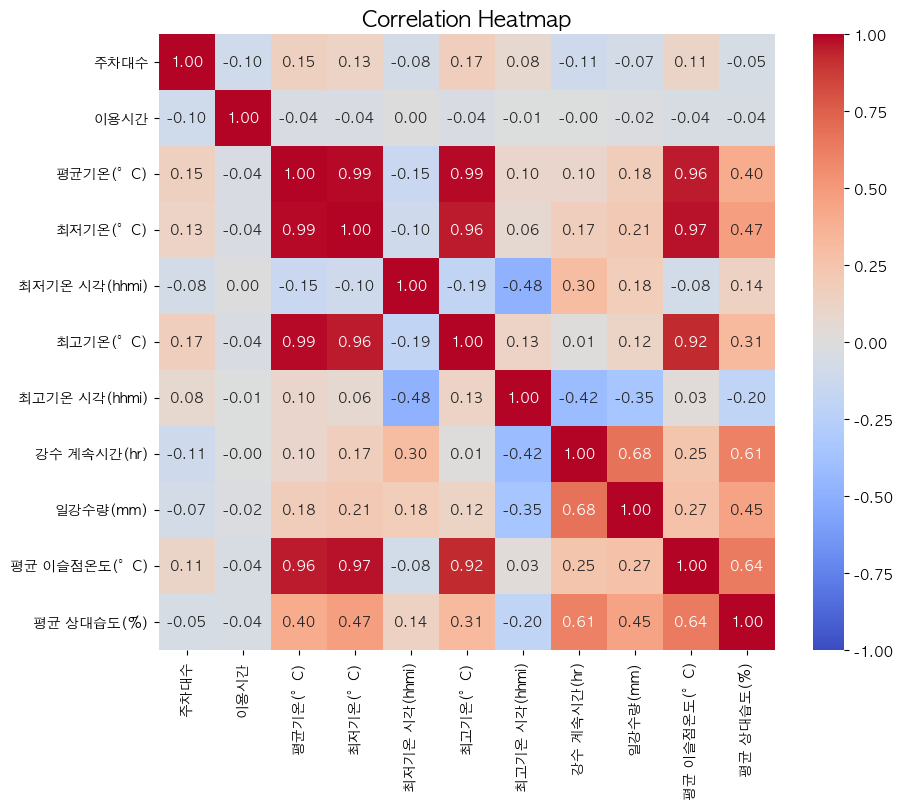

In [ ]:


# 데이터프레임 생성 (예시 데이터)
# df = pd.DataFrame(...) # 실제 데이터프레임을 여기에 넣으세요

# 상관계수 계산
correlation_matrix = merge_weather.select_dtypes('number').corr()

# 그림 크기 설정
plt.figure(figsize=(10, 8))

# heatmap 생성
sns.heatmap(correlation_matrix, 
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f')  # 소수점 둘째 자리까지 표시

# 제목 설정
plt.title('Correlation Heatmap', fontsize=16)

# 그래프 표시
plt.show()


In [ ]:
# 
merge_weather

,지구별,주차장명,주차대수,이용시간,날짜,code,년도,월,일,휴일여부,...,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%)
0,PLT-005,뚝섬1주차장,273,1.397497,2024-11-10,005,2024,11,10,주말,...,2024-11-10,14.4,10.3,536.0,21.0,1520,0.0,0.0,7.4,64.0
1,PLT-011,잠실1주차장,1059,1.044397,2024-11-10,011,2024,11,10,주말,...,2024-11-10,14.4,10.3,536.0,21.0,1520,0.0,0.0,7.4,64.0
2,PLT-001,강서1주차장,329,1.361449,2024-11-10,001,2024,11,10,주말,...,2024-11-10,14.4,10.3,536.0,21.0,1520,0.0,0.0,7.4,64.0
3,PLT-008,여의도5주차장,229,1.638210,2024-11-10,008,2024,11,10,주말,...,2024-11-10,14.4,10.3,536.0,21.0,1520,0.0,0.0,7.4,64.0
4,PLT-008,여의도2주차장,1934,1.293821,2024-11-10,008,2024,11,10,주말,...,2024-11-10,14.4,10.3,536.0,21.0,1520,0.0,0.0,7.4,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,4.228408,2020-01-16,008,2020,01,16,평일,...,2020-01-16,-1.7,-5.5,816.0,3.2,1430,0.0,0.0,-13.0,43.0
45273,PLT-001,강서1주차장,28,0.206548,2020-01-16,001,2020,01,16,평일,...,2020-01-16,-1.7,-5.5,816.0,3.2,1430,0.0,0.0,-13.0,43.0
45274,PLT-008,여의도1주차장,114,0.887865,2020-01-15,008,2020,01,15,평일,...,2020-01-15,-2.7,-6.4,722.0,2.2,1510,0.0,0.0,-13.4,44.8
45275,PLT-001,강서1주차장,12,0.094444,2020-01-15,001,2020,01,15,평일,...,2020-01-15,-2.7,-6.4,722.0,2.2,1510,0.0,0.0,-13.4,44.8


------

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
import numpy as np